# Лабораторная работа

В рамках лабораторной работы необходимо разработать параллельные алгоритмы, реализующие различные методы для вычисления интеграла $\int_{0}^{1}{\frac{4}{(1+x^{2})}}$.

В качестве методов численного интегрирования необходимо рассмотреть следующие 4 метода: 
- метод прямоугольников
- метод трапеций
- метод Симпсона
- метод Гаусса 3-го порядка точности 

## Метод прямоугольников

Пусть требуется определить значение интеграла функции на отрезке $[a, b]$. Этот отрезок делится точками $x_0, x_1, \ldots, x_{n-1}, x_n$ на $n$ равных отрезков длиной $\Delta {x}={\frac{b-a}{n}}$. 

Обозначим через $y_{0}, y_{1},\ldots ,y_{n-1},y_{n}$ значение функции $f\left(x\right)$ в точках $x_{0},x_{1},\ldots ,x_{n-1},x_{n}$. 

Далее составляем суммы $y_{0}\,\Delta {x} + y_{1}\, \Delta{x} + \ldots + y_{n-1}\, \Delta{x}$. Каждая из сумм — интегральная сумма для $f\left(x\right)$ на $\left[{a},{b}\right]$ и поэтому приближённо выражает интеграл

$$\int_{a}^{b}{f(x)\,dx} \approx {\frac {b-a}{n}} (y_{0} + y_{1} + \ldots + y_{n-1})$$ 

## Метод трапеций

Если функцию на каждом из частичных отрезков аппроксимировать прямой, проходящей через конечные значения, то получим метод трапеций.

Площадь трапеции на каждом отрезке:
$$I_{i} \approx {\frac {f(x_{i-1})+f(x_{i})}{2}}(x_{i}-x_{i-1})$$

Полная формула трапеций в случае деления всего промежутка интегрирования на отрезки одинаковой длины $h$:

$$I\approx h\left({\frac {f(x_{0})+f(x_{n})}{2}}+\sum _{i=1}^{n-1}f(x_{i})\right),$$ где $$ h={\frac {b-a}{n}}$$

## Метод Симпсона (метод парабол)

Использовав три точки отрезка интегрирования, можно заменить подынтегральную функцию параболой. Обычно в качестве таких точек используют концы отрезка и его среднюю точку. В этом случае формула имеет вид

$$ I\approx {\frac {b-a}{6}}\left(f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right)$$

## Метод Гаусса

Описанные выше методы используют фиксированные точки отрезка (концы и середину) и имеют низкий порядок точности (0 — методы правых и левых прямоугольников, 1 — методы средних прямоугольников и трапеций, 3 — метод парабол (Симпсона)). Если мы можем выбирать точки, в которых мы вычисляем значения функции $f(x)$, то можно при том же количестве вычислений подынтегральной функции получить методы более высокого порядка точности. Так для двух (как в методе трапеций) вычислений значений подынтегральной функции, можно получить метод уже не второго, а третьего порядка точности:

$$I\approx {\frac {b-a}{2}}\left(f\left({\frac {a+b}{2}}-{\frac {b-a}{2{\sqrt {3}}}}\right)+f\left({\frac {a+b}{2}}+{\frac {b-a}{2{\sqrt {3}}}}\right)\right)$$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
idx = pd.IndexSlice

### Зависимость среднего времени работы алгоритма от количества процессов

#### Результаты PC

In [2]:
pc_columns =['result', 'mpiexec', '-n', 'number_of_processes', 'python', 'main.py', 
          'method', 'a', 'b', 'n', 'elapsed_time', 'cpu_usage']
use_cols = ['result', 'number_of_processes', 'method', 'n', 'elapsed_time', 'cpu_usage']
df_pc = pd.read_csv('logs/res_pc.txt', sep=' ', header=None, names=pc_columns, usecols=use_cols)

df_pc.elapsed_time = df_pc.elapsed_time.map(lambda x: eval(str(x).replace('0:', '')))
df_pc.cpu_usage = df_pc.cpu_usage.map(lambda x: eval(str(x).replace('%', '')))

In [3]:
df_pc_g = df_pc.groupby(['method', 'number_of_processes', 'n']).agg({'elapsed_time':['mean','std'], 'cpu_usage':['mean','std']})

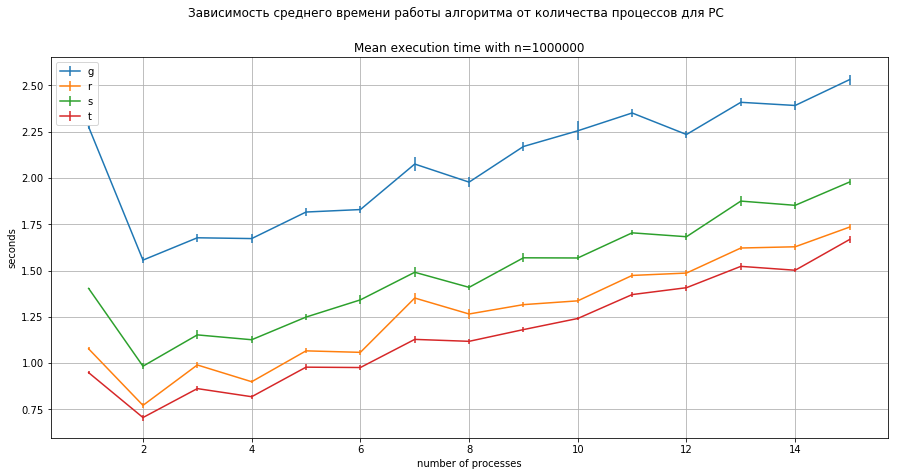

In [4]:
N = 1000000
mean_time = df_pc_g.loc[idx[:, :, N], 'elapsed_time']
mean_cpu = df_pc_g.loc[idx[:, :, N], 'cpu_usage']

fig, ax = plt.subplots(1, 1, figsize=(15,7))

for method in mean_time.index.levels[0]:
    d = mean_time.loc[method].reset_index(level=1, drop=True)
    ax.errorbar(x=d.index, y=d['mean'], yerr=d['std'] / np.sqrt(20), label=method)

fig.suptitle('Зависимость среднего времени работы алгоритма от количества процессов для PC')
ax.set_title('Mean execution time with n={}'.format(N))
ax.set_xlabel('number of processes')
ax.set_ylabel('seconds')
ax.grid()
ax.legend()

plt.show()

#### Результаты сервер

In [5]:
df_serv = pd.read_csv('logs/res_server.txt', sep=' ', header=None, names=pc_columns, usecols=use_cols)

df_serv.elapsed_time = df_serv.elapsed_time.map(lambda x: eval(str(x).replace('0:', '')))
df_serv.cpu_usage = df_serv.cpu_usage.map(lambda x: eval(str(x).replace('%', '')))

In [6]:
df_serv_g = df_serv.groupby(['method', 'number_of_processes', 'n']).agg({'elapsed_time':['mean','std'], 
                                                                         'cpu_usage':['mean','std']})

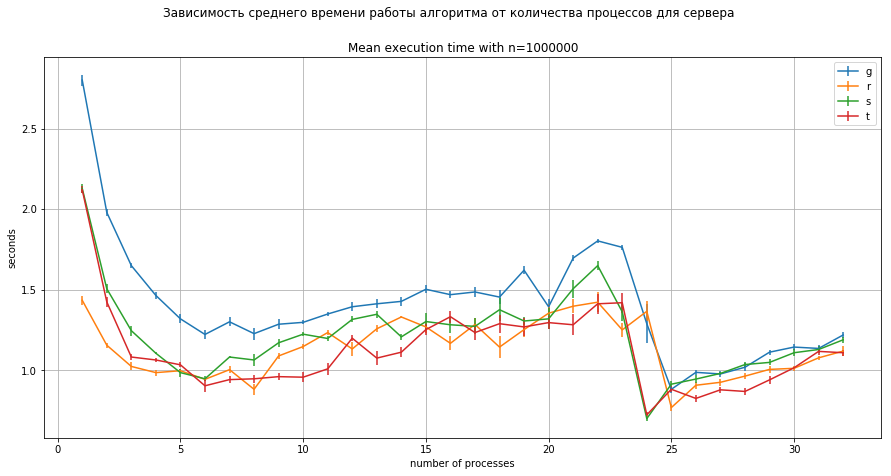

In [7]:
N = 1000000
mean_time = df_serv_g.loc[idx[:, :, N], 'elapsed_time']
mean_cpu = df_serv_g.loc[idx[:, :, N], 'cpu_usage']

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for method in mean_time.index.levels[0]:
    d = mean_time.loc[method].reset_index(level=1, drop=True)
    ax.errorbar(x=d.index, y=d['mean'], yerr=d['std'] / np.sqrt(20), label=method)

fig.suptitle('Зависимость среднего времени работы алгоритма от количества процессов для сервера')
ax.set_title('Mean execution time with n={}'.format(N))
ax.set_xlabel('number of processes')
ax.set_ylabel('seconds')
ax.grid()
ax.legend()

plt.show()

### Зависимость от верхней границы

In [8]:
names = ['result', 'mpiexec', '-n', 'number_of_processes', 'python', 'main.py', 
          'method', 'a', 'b', 'n', 'h', 'elapsed_time', 'cpu_usage']
use = ['result','method', 'b', 'elapsed_time', 'cpu_usage']
df_serv_N = pd.read_csv('logs/res_server_N.txt', header=None, sep=' ', names=names, usecols=use)

df_serv_N.elapsed_time = df_serv_N.elapsed_time.map(lambda x: eval(str(x).replace('0:', '')))
df_serv_N.cpu_usage = df_serv_N.cpu_usage.map(lambda x: eval(str(x).replace('%', '')))

In [9]:
df_serv_N_g = df_serv_N.groupby(['method', 'b']).agg({'elapsed_time':['mean','std'], 'cpu_usage':['mean','std']})

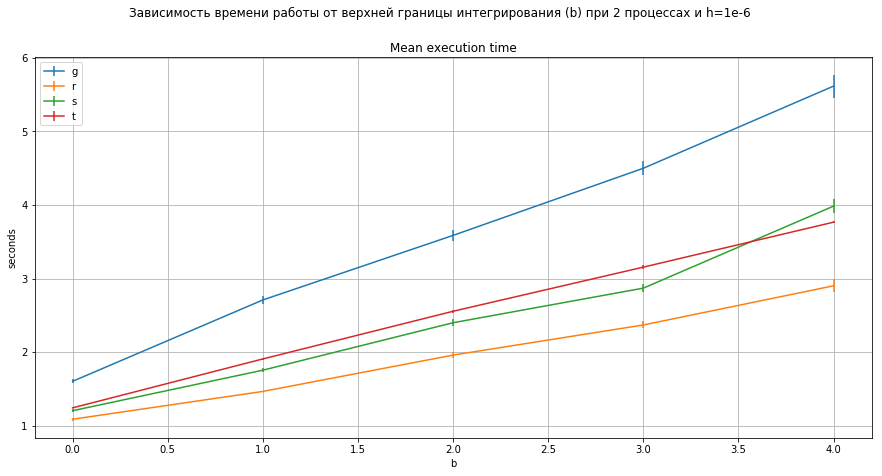

In [10]:
mean_cpu = df_serv_N_g.loc[:, 'cpu_usage']
mean_time = df_serv_N_g.loc[:, 'elapsed_time']

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

for method in mean_time.index.levels[0]:
    d = mean_time.loc[method].reset_index(level=0, drop=True)
    ax.errorbar(x=d.index, y=d['mean'], yerr=d['std'] / np.sqrt(20), label=method)

fig.suptitle('Зависимость времени работы от верхней границы интегрирования (b) при 2 процессах и h=1e-6')
ax.set_title('Mean execution time')
ax.set_xlabel('b')
ax.grid()
ax.legend()
ax.set_ylabel('seconds')


plt.show()